<a href="https://colab.research.google.com/github/idnunez/MAT-421/blob/main/ModuleE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT421 Module E

Isaac Nunez

Section 3.2: Continuity and Differentiation

Limits are an important concept for many mathematical applications. Limits can be used to find derivatives, determine continuity, and determine values that a function approaches.

A function is considered to be continuous on an interval if all values on that interval have a limit.

We can find limits using methods in python.

In [1]:
from sympy import *

#Setting up the following funciton to find the limit
x = symbols('x')
f = ((x+1)**2)/(x-5)

#Finding the limit of f as x approaches different values
print("The limit of f as x approaches -5 is ", limit(f,x,-5))
print("The limit of f as x approaches 0 is ", limit(f,x,0))
print("The limit of f as x approaches 5 is ", limit(f,x,5))

The limit of f as x approaches -5 is  -8/5
The limit of f as x approaches 0 is  -1/5
The limit of f as x approaches 5 is  oo


Derivatives are used to determine the rate of change of a function at a specific point.

The definition of a derivative is defined as:

$lim_{h\rightarrow 0} \frac{f(x+h) - f(x)}{h}$

A function is differentiable along an interval if all values on that interval have a derivative.

In [2]:
import numpy as np

x = symbols('x')
f = x**3 - 5*x**2 + 4*x + 2

print("d/dx(x**3 - 5*x**2 + 4*x + 2) = ", str(f.diff(x)))

f = cos(x)

print("d/dx(cos(x)) = ", str(f.diff(x)))

f = exp(x)

print("d/dx(e**x) = ", str(f.diff(x)))

d/dx(x**3 - 5*x**2 + 4*x + 2) =  3*x**2 - 10*x + 4
d/dx(cos(x)) =  -sin(x)
d/dx(e**x) =  exp(x)


Taylor's Theorem

Taylor's Theorem is a generalization of the mean value theorem that creates a polynomial approximation of a function.

These polynomials can be defined as:

$f(b) = \sum_{n=0}^{\infty} \frac{f^{(n)}(a)}{n!}(b-a)$

For example, the function sin(x) can be approximated as:

$sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!}...$

<ipython-input-25-babd41f41d7b>:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  taylor_order3 = lambda x: x - x**3/(np.math.factorial(3))
<ipython-input-25-babd41f41d7b>:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  taylor_order5 = lambda x: x - x**3/(np.math.factorial(3)) + x**5/(np.math.factorial(5))
<ipython-input-25-babd41f41d7b>:9: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  taylor_order7 = lambda x: x - x**3/(np.math.factorial(3)) + x**5/(np.math.factorial(5)) - x**7/(np.math.factorial(7))


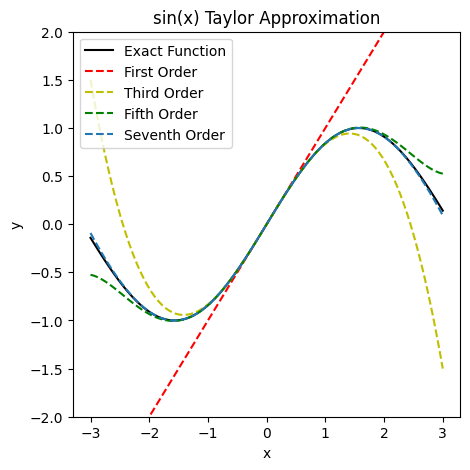

In [25]:
#Approximate sin(x) using a taylor series and demonstrate each iteration
import matplotlib.pyplot as plt

#Create each approximation for sin(x) using taylor's theorem
exact_function = lambda x: np.sin(x)
taylor_order1 = lambda x: x
taylor_order3 = lambda x: x - x**3/(np.math.factorial(3))
taylor_order5 = lambda x: x - x**3/(np.math.factorial(3)) + x**5/(np.math.factorial(5))
taylor_order7 = lambda x: x - x**3/(np.math.factorial(3)) + x**5/(np.math.factorial(5)) - x**7/(np.math.factorial(7))

#Set up functions for plotting
x_new = np.linspace(-3,3,100)
ex_new = exact_function(x_new)
o1_new = taylor_order1(x_new)
o3_new = taylor_order3(x_new)
o5_new = taylor_order5(x_new)
o7_new = taylor_order7(x_new)

#Display the functions, demonstrating how each consecutive polynomial of higher order gets closer to the actual function sin(x)
plt.figure(figsize = (5,5))
plt.plot(x_new, ex_new, 'k', label = 'Exact Function')
plt.plot(x_new, o1_new, 'r--', label = 'First Order')
plt.plot(x_new, o3_new, 'y--', label = 'Third Order')
plt.plot(x_new, o5_new, 'g--', label = 'Fifth Order')
plt.plot(x_new, o7_new, '--', label = 'Seventh Order')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-2,2)
plt.title('sin(x) Taylor Approximation')
plt.legend()
plt.show()

Section 3.3: Optimization using Gradient Descent

A global minimizer is a point $x \in P$ such that $f(x) \geq f(n) \forall n \in P$

A local minimizer is a point $x \in P$ such that there exists $\delta > 0$ such that $f(x) \geq f(n) \forall n \in Ps.t. |x-n|<\delta$

Gradient Descent is a method for finding local minimizers by iteratively following directions in thich f(x) decreases. This can be used to find a local minimum, but you cannot be sure if it is a global minimum.

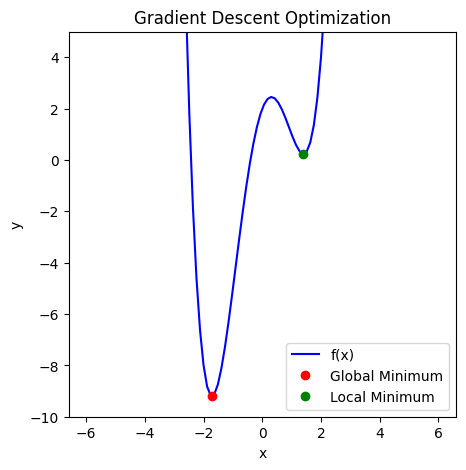

In [45]:
from scipy.optimize import minimize

#Defines a function to minimize
def f(x):
  return x**4 - 5*x**2 + 3*x + 2

x_new = np.linspace(-6,6,100)
y_new = f(x_new)

#Plot the original function
plt.figure(figsize = (5,5))
plt.plot(x_new, y_new, 'b', label = 'f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-10,5)
plt.title('Gradient Descent Optimization')

#Generate minimums using different x0 values
min1 = minimize(f, x0=-2)
min2 = minimize(f, x0=3)

#Generate points for plotting
xmin1 = min1.x
ymin1 = min1.fun
xmin2 = min2.x
ymin2 = min2.fun

plt.plot(xmin1, ymin1, 'ro', label = 'Global Minimum')
plt.plot(xmin2, ymin2, 'go', label = 'Local Minimum')
plt.legend()

plt.show()